In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
# Creating data to view and feed

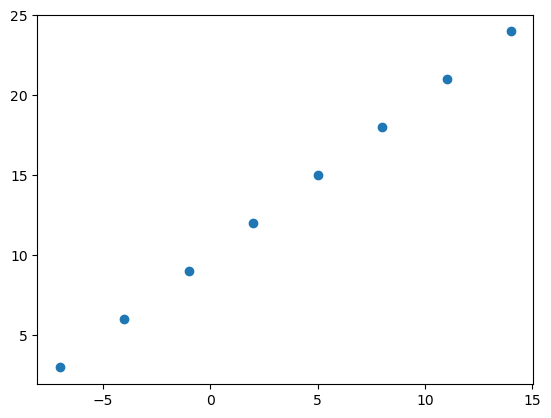

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Create the features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visulize it
plt.scatter(x,y);

In [4]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
# Inputs and Outputs Shapes

In [22]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["beadroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beadroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [23]:
x[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [24]:
x[1],y[1]

(<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>)

In [25]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

In [26]:
x[0].ndim

0

In [27]:
# Turn our Numpy arrays into tensor

In [28]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [29]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

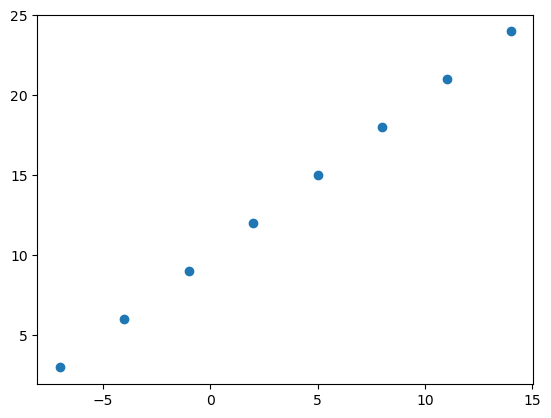

In [30]:
plt.scatter(x,y)

In [31]:
#Modelling with Tensorflow

In [32]:
# 1.Create a model using the Sequential API
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.legacy.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])
# 3. Fit the model
# model.fit(x,y,epochs=5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

# 4.Evaluate the model
# model.evaluate(x_test,y_test)

Epoch 1/5
1/1 [==============================] - 0s 109ms/step - loss: 14.2453 - mae: 14.2453
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 14.1128 - mae: 14.1128
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 13.9803 - mae: 13.9803
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 13.8478 - mae: 13.8478
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 13.7153 - mae: 13.7153


2023-08-17 09:24:43.591751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [33]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
# try and make a prediction using our model
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 35ms/step


2023-08-17 09:24:44.730994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[-0.59506494]], dtype=float32)

In [35]:
# Imporving our model

In [36]:
# 1. Create the model
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)
#2.Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.legacy.Adam(lr=0.0001),
             metrics=["mae"] 
             )

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 181ms/step - loss: 10.9626 - mae: 10.9626
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9621 - mae: 10.9621
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9617 - mae: 10.9617
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9612 - mae: 10.9612
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9608 - mae: 10.9608


2023-08-17 09:24:46.388456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [37]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 33ms/step


2023-08-17 09:24:49.445112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[12.33369]], dtype=float32)

In [57]:
# Lets rebuild the model

# 1.Create the model
model=tf.keras.Sequential(
    [tf.keras.layers.Dense(1)]
)

# 2.Compile the Model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)
#3.fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 118ms/step - loss: 20.9610 - mae: 20.9610
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 20.5754 - mae: 20.5754
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 20.2941 - mae: 20.2941
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 20.0129 - mae: 20.0129
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 19.7316 - mae: 19.7316
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 19.4504 - mae: 19.4504
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 19.1691 - mae: 19.1691
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 18.8879 - mae: 18.8879
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 18.6066 - mae: 18.6066
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 18.3254 - mae: 18.3254
Epoch 11/100
1/1 [==============================] - 0s 

2023-08-17 09:58:48.635916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 20/100
1/1 [==============================] - 0s 7ms/step - loss: 15.5129 - mae: 15.5129
Epoch 21/100
1/1 [==============================] - 0s 6ms/step - loss: 15.2316 - mae: 15.2316
Epoch 22/100
1/1 [==============================] - 0s 7ms/step - loss: 14.9504 - mae: 14.9504
Epoch 23/100
1/1 [==============================] - 0s 5ms/step - loss: 14.6982 - mae: 14.6982
Epoch 24/100
1/1 [==============================] - 0s 22ms/step - loss: 14.5657 - mae: 14.5657
Epoch 25/100
1/1 [==============================] - 0s 9ms/step - loss: 14.4332 - mae: 14.4332
Epoch 26/100
1/1 [==============================] - 0s 5ms/step - loss: 14.3007 - mae: 14.3007
Epoch 27/100
1/1 [==============================] - 0s 5ms/step - loss: 14.1682 - mae: 14.1682
Epoch 28/100
1/1 [==============================] - 0s 6ms/step - loss: 14.0357 - mae: 14.0357
Epoch 29/100
1/1 [==============================] - 0s 5ms/step - loss: 13.9032 - mae: 13.9032
Epoch 30/100
1/1 [==============================]

In [58]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 23ms/step


2023-08-17 09:58:49.549038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[29.391077]], dtype=float32)

In [73]:
#Adding Adam optimizer
# Lets rebuild the model

# 1.Create the model
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50,activation=None),
        tf.keras.layers.Dense(1)
    ]
)

# 2.Compile the Model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]
)
#3.fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 152ms/step - loss: 13.3743 - mae: 13.3743
Epoch 2/100


/Users/ashfaqkhanrafin/miniconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2023-08-17 10:07:47.820815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 7ms/step - loss: 12.6658 - mae: 12.6658
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9593 - mae: 11.9593
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2522 - mae: 11.2522
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5425 - mae: 10.5425
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8271 - mae: 9.8271
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 9.1024 - mae: 9.1024
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3648 - mae: 8.3648
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6112 - mae: 7.6112
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8386 - mae: 6.8386
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 6.7446 - mae: 6.7446
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0804 - m

In [75]:
model.predict([17.0,7.0])

1/1 [==============================] - 0s 98ms/step


array([[27.837563],
       [17.238821]], dtype=float32)

In [76]:
##Evaluting a model

In [77]:
x=tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [78]:
y=x+10

In [79]:
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

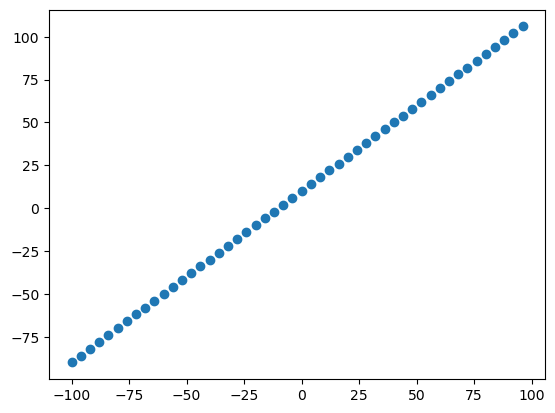

In [81]:
#visulizing the data
import matplotlib.pyplot as plt

plt.scatter(x,y)

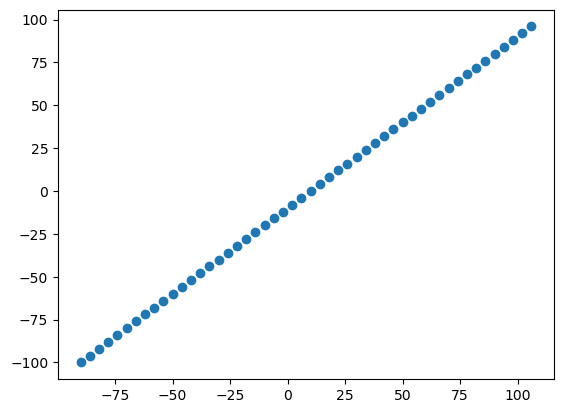

In [82]:
plt.scatter(y,x)

### The 3 sets...
***Traning set***-the model learns from this data,which is typically 70-80% of the total data i have available.

***Validation set***- the model gets tuned on this data, which is typically 10-15% of the data available.

***Test set***- the model gets evaluated on this data to test what is has learned, this set typically 10-15% of the total data available

In [83]:
#check the length of how many samples we have
len(x)

50

In [87]:
#Split the data into train and test set
x_train=x[:40]
y_train=y[:40]
x_test=x[40:]
y_test=y[40:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

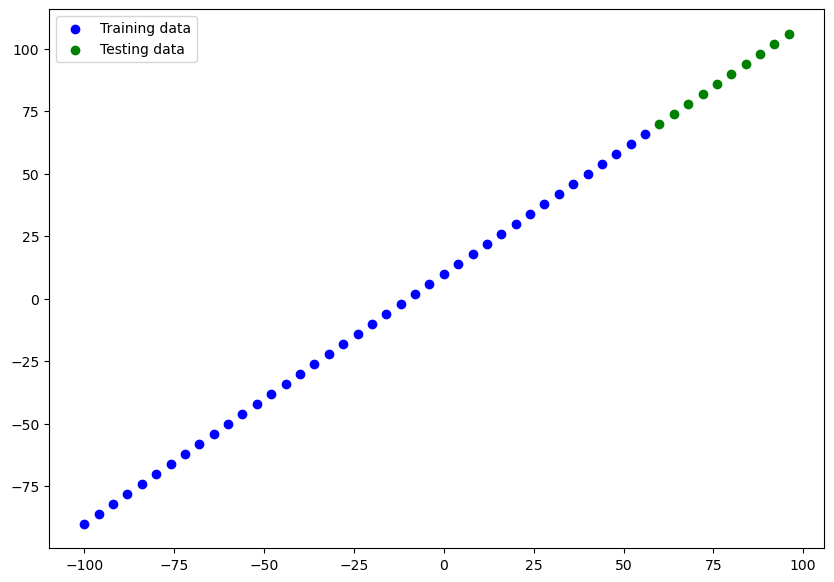

In [95]:
#visualizing the data
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(x_train,y_train,c="b",label="Training data")
#plot training data in green
plt.scatter(x_test,y_test,c="g",label="Testing data")
#Show a legend
plt.legend();

In [105]:
# Lets have a look at how to build a neural nwtwork for our data

#1.Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)
# 3. Fit the model
# model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

In [111]:
x[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [115]:
#Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

#1.create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2.compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

In [116]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
